# PROJECT TITLE:SIMPLE LINEAR REGRESSION
# AUTHOR: ARNOLD KWAME ATCHOE
# https://github.com/kwameape123/datafun-07-ml

In [40]:
# import dependencies of this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1: CHART A STRAIGHT LINE (FAHRENHEIT AND CELSIUS DATA)
Generate random fahrenheit values in the range of 0 to 100 degrees in 10-degree increaments.Calculate the eqvivalent celsius value using the conversion formula indicate below. Plot the linear relationship between fahrenheit values and celsius values.

In [3]:
# Formular conversion from fahrenheit to celsius. the "lambda function enables this conversion"
c = lambda f: 5/9 * (f-32)

# generate farehenheit and clesius pairs in tuple
temps = [(f,c(f)) for f in range(0,101,10)]

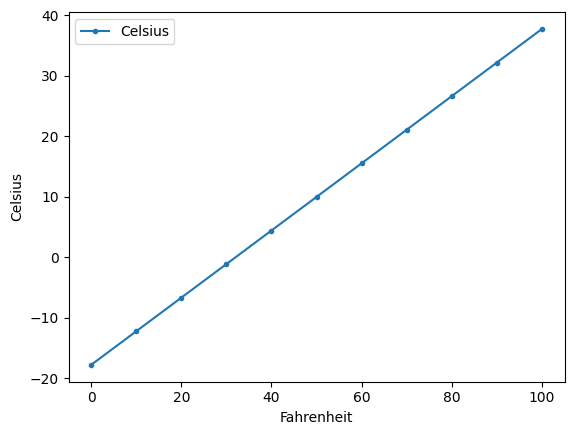

In [4]:
## plot the linear relationship between celsius and fahrenheit

# Convert list of tuple pairs into dataframe
temps_df =pd.DataFrame(temps, columns= ['Fahrenheit', 'Celsius'])

# Create plot
axes = temps_df.plot(x ='Fahrenheit', y ='Celsius', style ='.-')

#set y-axis label to Celsisus
y_label = axes.set_ylabel('Celsius')


## PART 2- PREDICTION (NEW YORK CITY JANUARY AVERAGE HIGH TEMPERATURE ANALYSIS.)
Applying linear regression on average high january temperatures of New York City. Using this approach we will generate an equation that can be used to predict average high temperatures for the month of january for specified years.

### SECTION1-DATA ACQUISITION 
Data use in this project was acquired from the files attached to the textbook. The name of our dataset is "ave_hi_nyc_jan_1895-2018.csv" and we loaded it into a pandas dataframe name "nyc". Our dataset containings avaerage high tempratures for the month of January for years 1895 to 2018.

In [5]:
# read dataset store in csv format.
# Dataset contains the average high temperature for the month of January for years 1895 to 2018.

nyc = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")


### SECTION 2-DATA INSPECTION
Check how many columns, rows  the dataset has using the ```nyc.head()``` and ```nyc.tail()``` attributes of the nyc dataframe.

In [6]:
# Explore the head of nyc
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
# Explore the tail of nyc
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### OBSERVATION
Our dataset consists of three columns, representing three features or characteristics, and includes 124 rows. The "Date" column indicates January of a specific year for each recorded temperature. The "Value" column represent the average temperature for the month of January of a specific year. The last column named "Anomaly" is the different between the "Value" column and the average of the "Value" column.

### SECTION 3- DATA CLEANING
Ensure dataset is in the right form for analysis and easy understanding. It includes, column renaming, data transformation and feature engineering.

In [8]:
# Rename the "Value" column to Temperature for readability and understanding.
nyc.columns = ['Date','Temperature','Anomaly']
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
# Check data type of the date feature or variable.
nyc.Date.dtype

dtype('int64')

In [10]:
# Drop the 01 represent the January in the "Date" column to make more readable on a graph
# We use floor division since the "Date" data type is an integer and can git rid of the reminder.
nyc.Date = nyc.Date.floordiv(100)

# Inspect if transformation was implemented.
nyc.head()


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


#### OBSERVATION
1. "Value" column name was changed to "Temperature".
2. Drop the month from the "Date" column since January is the only month being analysed.


### SECTION 4- DESCRIPTIVE STATISTICS
Understand dataset's distibution by analysing its descriptive statistics.

In [11]:
# Analyze descriptive statistics of the Temperature feature or variable.
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### OBSERVATION
1. Dataset has 124 observations as indicated before. Our mean is 37.60, the same as our 50th percentile.
2. Temperature ranges from 26.10 to 47.60.
3. 25% of temperatures recorded are below 34.58 and 75% above 40.60.


### SECTION 5- BUILD MODEL
Using linear regression, we determine the slope and intercept for our dataset. Doing this results in a linear equation that can be used to predict our dependent variable temperature given a year.

In [12]:
# Calculate intercept and slope of a give set of data points.
linear_regression = sp.stats.linregress(x = nyc.Date, y= nyc.Temperature)

In [13]:
# Display intercept of dataset
linear_regression.intercept

np.float64(8.694993233674289)

In [14]:
# Display slope of dataset
linear_regression.slope

np.float64(0.014771361132966163)

#### OBSERVATION
The resulting intercept and slope of our dataset is 8.694993233674289 and 0.014771361132966163 respectively. Hence we have the linear equation 
Temperature = 0.014771361132966163(Date)+ 8.694993233674289 which the same as Temperature = linear_regression.slope*Date + linear_regression.intercept. We can now use this equation to predict temperatures for specific years.

### SECTION 6- PREDICT
Use the linear equation to predict average high temperatures for January 2019 and January 2024 as well as approximate that of January 1890.

In [15]:
# Predict average high January Temperature for 2019
linear_regression.slope*2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [16]:
# Predict average high January Temperature for 2024
linear_regression.slope*2024 + linear_regression.intercept

np.float64(38.5922281667978)

In [17]:
# approximate average January temperature for 1890
linear_regression.slope*1890 + linear_regression.intercept


np.float64(36.612865774980335)

#### OBSERVATION
1. Average high january temperature for 2019 is 38.5922281667978
2. Average high january temperature for 2024 is 38.5922281667978
3. Average high january temperature for 1890 is 36.612865774980335

### SECTION 7-VISUALIZATION
Plot the relationship between "Dates" and "Temperature" as well as the line of best fit that represent our linear equation used to predict Temperatures given a "Date".

(10.0, 70.0)

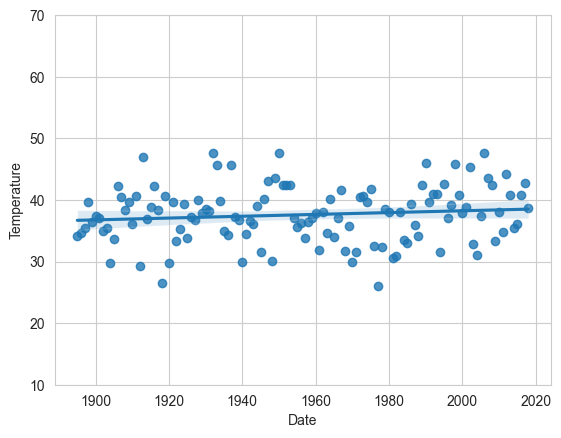

In [18]:
# Create a scatterplot for the dataset with the line of best fit
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Increase graph size or scale to emphasize linear relationship
axes.set_ylim(10,70)

#### OBSERVATION
The regression line sloping from left to right is an indication of increasing temperatures over the years and could be an indicator of global warming.

## PART 3- PREDICTION (NEW YORK CITY JANUARY AVERAGE HIGH TEMPERATURE ANALYSIS USING SCIKIT LEARN)
Applying linear regression on average high january temperatures of New York City. Using this approach we will generate an equation that can be used to predict average high temperatures for the month of january for specified years.

### SECTION 1- BUILD MODEL
1. Use Scikit-learn estimator to implement simple linear regression for our nyc dataframe.
2. Plot data and regression line using the respective seaborn's scatterplot function and matplotlib's plot function.
3. Use slope or coefficient/slope and intercept values to calculated by the scikit-learn estimator to make predictions.

#### SPLIT DATASET
We split our dataset into training dataset and testing dataset. Doing allows for the testing the resulting model. Before spliting our dataset we must ensure is at least two dimensional.

In [22]:
# Split dataset into train dataset and test dataset
x_train, x_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1),nyc.Temperature.values,
                                                                       random_state = 11)

In [25]:
# Confirm 75% - 25% train-test split
x_train.shape

(93, 1)

In [26]:
# Confirm 75% - 25% train-test split
x_test.shape

(31, 1)

#### TRAIN THE MODEL
Using our train dataset and linear regression algorithm, we train our model to generate our slope and intercept.


In [30]:
# Train model using linear regression
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [32]:
# View returned coefficient or slope.
linear_regression.coef_

array([0.01939167])

In [33]:
# View returned intercept.
linear_regression.intercept_

np.float64(-0.30779820252656975)

### SECTION 2- TEST THE MODEL
Test model generated by the estimator using out test dataset.

In [34]:
# Test generate model using test dataset. Display dependent variable predicted by the model and its expected value.
predicted = linear_regression.predict(x_test)
excepted = y_test
for p, e in zip(predicted[::5],excepted[::5]):
    print(f'predicted:{p:.2f}, expected:{e:.2f}')

predicted:37.86, expected:31.70
predicted:38.69, expected:34.80
predicted:37.00, expected:39.40
predicted:37.25, expected:45.70
predicted:38.05, expected:32.30
predicted:37.64, expected:33.80
predicted:36.94, expected:39.70


### Section 3- PREDICT
Use coefficient and intercept to predict average high temperature for january 2024.


In [43]:
# predict temperatures using co-efficient and intercept.
predict = (lambda x:linear_regression.coef_*x+linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4- VISUALIZATION
Use seaborn and matplotlib to generate a scatterplot for our dataset and line of best fit for model.

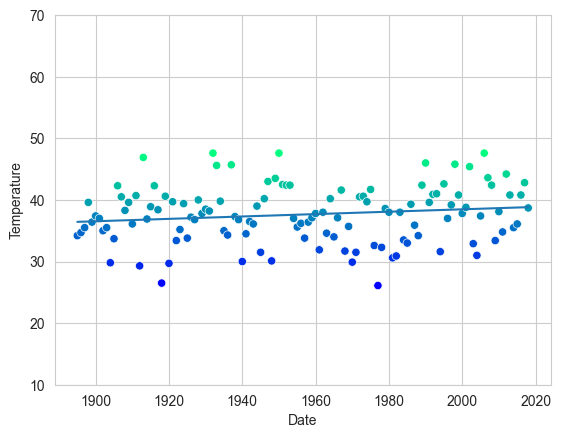

In [41]:
# Generate scatterplot and line of best fit.
axes = sns.scatterplot(data= nyc,x= 'Date', y= 'Temperature',hue= 'Temperature', palette = 'winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values),max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)



##### OBSERVATION
Since this is the only model developed for our dataset, we cannot compare it with other models. However, considering the result of testing, our predictions and scatter plot, our model performs fairly well for years closer to the range of our dataset.